## Apple Quality Prediction

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import pickle

import warnings
warnings.filterwarnings('ignore')

/var/folders/ls/t_h6xnpn34x6bdfxpqg16hwh0000gn/T/ipykernel_3023/601503041.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 1. Data Ingestion

In [2]:
# Reading data from csv file and making dataframe
df = pd.read_csv('apple_quality_data.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
# Convert column name in snake case form
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.head()

,a_id,size,weight,sweetness,crunchiness,juiciness,ripeness,acidity,quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


### 2. Exploratory Data Analysis

#### Basic Information

In [4]:
# Checking the shape
df.shape

(4001, 9)

In [5]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a_id         4000 non-null   float64
 1   size         4000 non-null   float64
 2   weight       4000 non-null   float64
 3   sweetness    4000 non-null   float64
 4   crunchiness  4000 non-null   float64
 5   juiciness    4000 non-null   float64
 6   ripeness     4000 non-null   float64
 7   acidity      4001 non-null   object 
 8   quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


**Observation:** We will need to encode the target variable quality to binary/numerical format and acidity column should be float.

In [6]:
# Basic description
df.describe()

,a_id,size,weight,sweetness,crunchiness,juiciness,ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


#### Missing Value Handling

In [7]:
# Checking missing values
df.isnull().sum()

a_id           1
size           1
weight         1
sweetness      1
crunchiness    1
juiciness      1
ripeness       1
acidity        0
quality        1
dtype: int64

**Observation:** Very few values are missing. We can drop them.

In [8]:
# Dropping the missing value
df_main = df.dropna()
df_main.isnull().sum()

a_id           0
size           0
weight         0
sweetness      0
crunchiness    0
juiciness      0
ripeness       0
acidity        0
quality        0
dtype: int64

#### Feature: `acidity`

In [9]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a_id         4000 non-null   float64
 1   size         4000 non-null   float64
 2   weight       4000 non-null   float64
 3   sweetness    4000 non-null   float64
 4   crunchiness  4000 non-null   float64
 5   juiciness    4000 non-null   float64
 6   ripeness     4000 non-null   float64
 7   acidity      4000 non-null   object 
 8   quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [10]:
df_main.head()

,a_id,size,weight,sweetness,crunchiness,juiciness,ripeness,acidity,quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


**Observation:** Column `acidity` should be float.

In [11]:
# Converting acidity columns as float
df_main['acidity'] = df_main['acidity'].astype(float)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a_id         4000 non-null   float64
 1   size         4000 non-null   float64
 2   weight       4000 non-null   float64
 3   sweetness    4000 non-null   float64
 4   crunchiness  4000 non-null   float64
 5   juiciness    4000 non-null   float64
 6   ripeness     4000 non-null   float64
 7   acidity      4000 non-null   float64
 8   quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


#### Target Feature: `quality`

In [12]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a_id         4000 non-null   float64
 1   size         4000 non-null   float64
 2   weight       4000 non-null   float64
 3   sweetness    4000 non-null   float64
 4   crunchiness  4000 non-null   float64
 5   juiciness    4000 non-null   float64
 6   ripeness     4000 non-null   float64
 7   acidity      4000 non-null   float64
 8   quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [13]:
df_main.head()

,a_id,size,weight,sweetness,crunchiness,juiciness,ripeness,acidity,quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


**Observation:** We need to encode the target variable Quality to binary/numerical format.

In [14]:
# Encoding the target variable
df_main['quality'] = df_main['quality'].map({'good': 1, 'bad': 0})
df_main.head()

,a_id,size,weight,sweetness,crunchiness,juiciness,ripeness,acidity,quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


#### Check Data Balance

In [15]:
df_main['quality'].value_counts()

quality
1    2004
0    1996
Name: count, dtype: int64

**Observation:** Dataset is balanced.

#### Data Distribution 

In [16]:
df_main.describe()

,a_id,size,weight,sweetness,crunchiness,juiciness,ripeness,acidity,quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877,0.501000
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270,0.500062
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538,0.000000
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424,0.000000
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609,1.000000
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493,1.000000
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736,1.000000


**Observation:** The features seem to be normally distributed as it looks from the description.

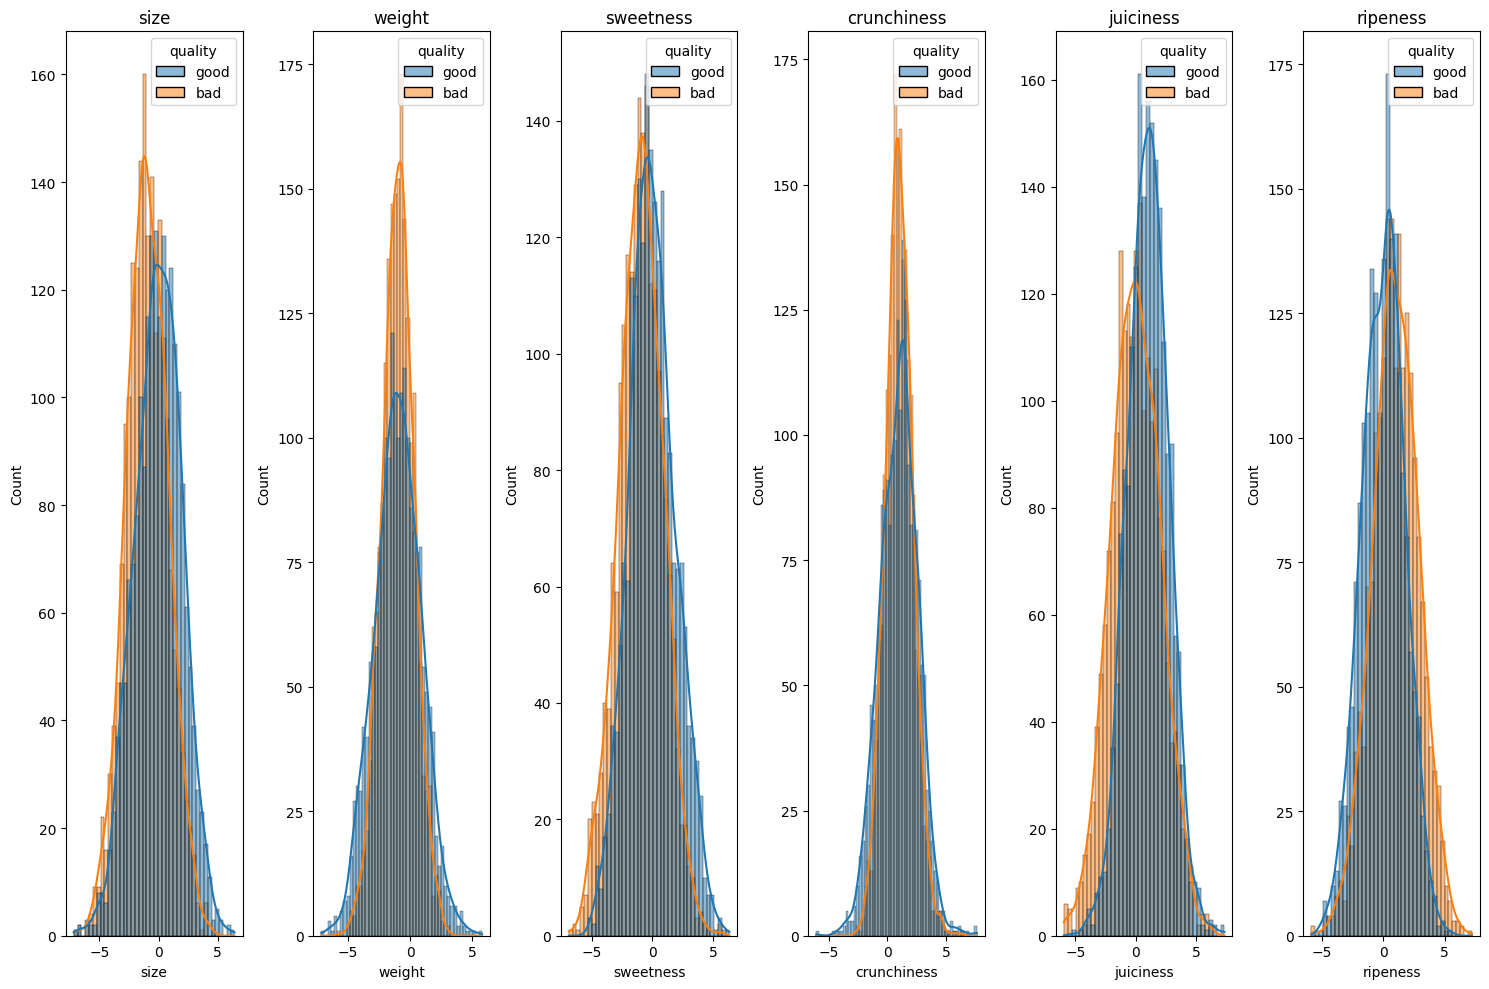

In [17]:
cols = [ 'size', 'weight', 'sweetness', 'crunchiness', 'juiciness','ripeness']
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(15, 10))

for i, col in enumerate(cols):
    sns.histplot(x=col, data=df, kde=True, hue='quality', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### 3. Model Training

In [18]:
# Basic display
df_main.head()

,a_id,size,weight,sweetness,crunchiness,juiciness,ripeness,acidity,quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [19]:
# Dropping the `a_id` column since this is just indexing
df_full = df_main.drop(columns=['a_id'])
df_full.head()

,size,weight,sweetness,crunchiness,juiciness,ripeness,acidity,quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


#### Setting Validation Framework

In [20]:
# Splitting dataset
df_train, df_test = train_test_split(df_full, test_size=0.2, random_state=1)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.quality.values
y_test = df_test.quality.values

del df_train['quality']
del df_test['quality']

####  Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model with the training data
logreg.fit(df_train, y_train)

# Predicting the Test set results
y_pred = logreg.predict(df_test)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


#### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier model
rf_classifier = RandomForestClassifier()

# Fit the model with the training data
rf_classifier.fit(df_train, y_train)

# Predicting the Test set results
y_pred_rf = rf_classifier.predict(df_test)

# Calculating the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")

Random Forest Classifier Accuracy: 0.90


### 4. Training Final Model

In [23]:
# Function to train the model
def train(df_train, y_train):
    model = RandomForestClassifier()
    model.fit(df_train, y_train)

    return model

In [24]:
# Function to predict
def predict(df_test, model):
    y_pred = model.predict(df_test)

    return y_pred

In [25]:
# Model Training
model = train(df_train, y_train)
y_pred = predict(df_test, model)

In [26]:
# Calculating the accuracy score
model_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {model_accuracy:.2f}")

Random Forest Classifier Accuracy: 0.90


### 5. Save, Load and Test Model

#### Save File

In [27]:
# Constructing the model file name
output_file_name = f'rfc_model.bin'
output_file_name

'rfc_model.bin'

In [28]:
# Opening file and saving the model
with open(output_file_name , 'wb') as f_out:
    pickle.dump(model, f_out)

#### Load File

In [29]:
model_name = 'rfc_model.bin'

In [30]:
# Opening file and loading the model
with open(model_name, 'rb') as f_in:
    model = pickle.load(f_in)

In [31]:
model

RandomForestClassifier()

#### Testing Loaded Model

In [32]:
# Selecting one random apple
apple = df_test.iloc[0].to_dict()

# Convert the dictionary to a DataFrame
apple_df = pd.DataFrame([apple])

# Use the trained model to predict
prediction = model.predict(apple_df)

# Output the prediction
print("Predicted Quality:", prediction[0])

Predicted Quality: 0
